In [9]:
#calculate change rate
from apexpy import Apex
from numpy import empty, sqrt, arccos, cos, sin
from math import pi

def geo2qd(time, lats, lons, height=0):
    apex = Apex(time)
    return apex.geo2qd(lats, lons, height)

def ll2xyz(lats, lons):
    deg2rad = pi/180.
    lats = deg2rad * lats
    lons = deg2rad * lons
    cos_lons = cos(lons)
    return (
            cos(lats)*cos_lons,
            sin(lats)*cos_lons,
            sin(lons), 
    )

def distance_sph(lats0, lons0, lats1, lons1):
    x0, y0, z0 = ll2xyz(lats0, lons0)
    x1, y1, z1 = ll2xyz(lats1, lons1)
    return arccos(x0*x1 + y0*y1 + z0*z1) * (180/pi)
    
def distance_cart(lats0, lons0, lats1, lons1):
     return sqrt((lats1 - lats0)**2 + (lons1 - lons0)**2)

In [10]:
from datetime import datetime
from numpy import meshgrid, linspace

# spherical GEO coordinates - longitude [deg], latitude [deg]
#lat_step, lon_step = .1, .1 # deg
lat_step, lon_step = 0.5, 0.5 # deg
eps = 1e-3    
lons2d, lats2d = meshgrid(
    linspace(-180, 180, 1 + int(360./lon_step)),
    linspace(-90 + eps, 90 - eps, 1 + int(180./lat_step))
)

time = 2018.0 # decimal year
height = 450 # km

qdlats0, qdlons0 = geo2qd(time, lats2d, lons2d, height=0)
qdlats1, qdlons1 = geo2qd(time, lats2d, lons2d, height=height)

change2d = distance_sph(qdlats0, qdlons0, qdlats1, qdlons1)

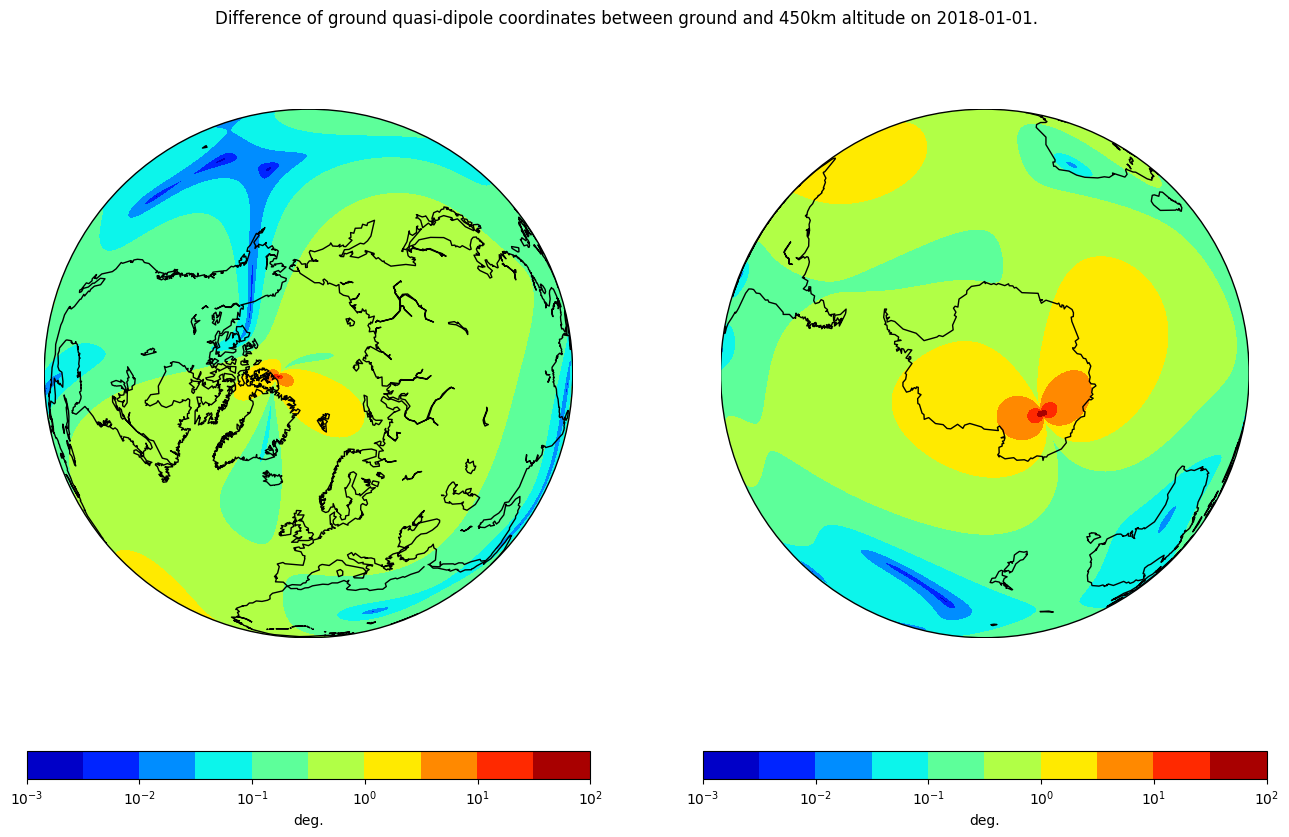

In [20]:
from matplotlib import pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap

fig=plt.figure(figsize=(16, 10), dpi=100, facecolor='w', edgecolor='k')


def decorate_map(map):
    map.drawcoastlines(color='k')

def plot_data(map, lats, lons, data, **opts):
    #obj = map.pcolor(lons, lats, data, latlon=True, **opts)
    obj = map.contourf(
        lons, lats, data,
        norm=colors.LogNorm(),
        cmap='jet',
        levels=[0.001, 0.0031623, 0.01, 0.031623, 0.1, 0.31623, 1.0, 3.1623, 10., 31.623, 100],
        latlon=True,
        **opts
    )
    cbar = plt.colorbar(obj, orientation="horizontal")
    cbar.ax.set_xlabel("deg.")

#def plot_data2(map, lats, lons, data, **opts):
#    obj = map.pcolor(
#            lons, lats, data, latlon=True,
#            vmin=0.001, vmax=100., norm=colors.LogNorm(),
#            **opts
#    )
#    cbar = plt.colorbar(obj, orientation="horizontal")
#    cbar.ax.set_xlabel("deg.")

plt.suptitle("Difference of ground quasi-dipole coordinates between ground and 450km altitude on 2018-01-01.")


plt.subplot(121)
map = Basemap(projection='ortho', lon_0=0, lat_0=90)
decorate_map(map)
plot_data(map, lats2d, lons2d, change2d)

plt.subplot(122)
map = Basemap(projection='ortho', lon_0=0, lat_0=-90)
decorate_map(map)
plot_data(map, lats2d, lons2d, change2d)

plt.show()